In [1]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [7]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

In [9]:
year = pd.to_datetime(df.Date).dt.year

train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [10]:
inputs = list(train_df)[1:-1]
targets = 'RainTomorrow'
train_input = train_df[inputs]
train_target = train_df[targets]

In [11]:
test_input = test_df[inputs]
test_target = test_df[targets]

In [12]:
num_cols = train_input.select_dtypes(include=np.number).columns.to_list()
cat_cols = train_input.select_dtypes('object').columns.to_list()

In [13]:
preprocess = ColumnTransformer([
    ('num', Pipeline([
        ('impute', SimpleImputer(strategy  =  'mean')),
        ('scale', MinMaxScaler())
    ]), num_cols),

    ('cat', Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ]), cat_cols)
])

In [14]:
pipe = Pipeline([
    ('prep', preprocess),
    ('model', DecisionTreeClassifier(random_state=42))
])

In [15]:
mod = GridSearchCV(estimator = pipe,
                  param_grid = {'model__max_depth': [1,2,3, 4,5, 6,7, 8,9,10,11, 12, None],
                               'model__max_leaf_nodes': [16,32,64,128]},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [16]:
print("Numeric columns:")
print(num_cols)

print("\nCategorical columns:")
print(cat_cols)


Numeric columns:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Categorical columns:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [17]:
mod.fit(train_input, train_target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',
                                                                          'Cloud9am',
                                                                          'Cloud3pm',
                                                                          'Temp9am...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday'])])),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, None],
                         'model__max_leaf_nodes': [16, 32, 64, 128]},
             return_train_score=True, scoring='accuracy')

In [18]:
prediction = mod.predict(test_input)

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(test_target, prediction)

0.8232463232463233

In [20]:
results = pd.DataFrame(mod.cv_results_)

In [21]:
depths = results['param_model__max_depth']
train_error = 1 - results['mean_train_score']
val_error   = 1 - results['mean_test_score']

In [22]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,param_model__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.149128,0.008471,0.052499,0.000388,1,16,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.802249,0.811735,0.820039,0.811341,0.007268,46,0.806749,0.817660,0.824191,0.816200,0.007195
1,0.142866,0.000917,0.052396,0.000672,1,32,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.802249,0.811735,0.820039,0.811341,0.007268,46,0.806749,0.817660,0.824191,0.816200,0.007195
2,0.142138,0.001026,0.052413,0.000455,1,64,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.802249,0.811735,0.820039,0.811341,0.007268,46,0.806749,0.817660,0.824191,0.816200,0.007195
3,0.141798,0.001213,0.052373,0.000787,1,128,"{'model__max_depth': 1, 'model__max_leaf_nodes...",0.802249,0.811735,0.820039,0.811341,0.007268,46,0.806749,0.817660,0.824191,0.816200,0.007195
4,0.183062,0.001331,0.052156,0.000210,2,16,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.829131,0.820524,0.820039,0.823231,0.004176,15,0.818463,0.820418,0.824191,0.821024,0.002377
5,0.183899,0.000161,0.052328,0.000214,2,32,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.829131,0.820524,0.820039,0.823231,0.004176,15,0.818463,0.820418,0.824191,0.821024,0.002377
6,0.184339,0.000624,0.052762,0.000447,2,64,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.829131,0.820524,0.820039,0.823231,0.004176,15,0.818463,0.820418,0.824191,0.821024,0.002377
7,0.186399,0.001262,0.053618,0.000980,2,128,"{'model__max_depth': 2, 'model__max_leaf_nodes...",0.829131,0.820524,0.820039,0.823231,0.004176,15,0.818463,0.820418,0.824191,0.821024,0.002377
8,0.225745,0.001334,0.053842,0.000856,3,16,"{'model__max_depth': 3, 'model__max_leaf_nodes...",0.827282,0.825403,0.819978,0.824221,0.003097,11,0.830479,0.831434,0.829176,0.830363,0.000925
9,0.232246,0.003460,0.055954,0.002213,3,32,"{'model__max_depth': 3, 'model__max_leaf_nodes...",0.827282,0.825403,0.819978,0.824221,0.003097,11,0.830479,0.831434,0.829176,0.830363,0.000925


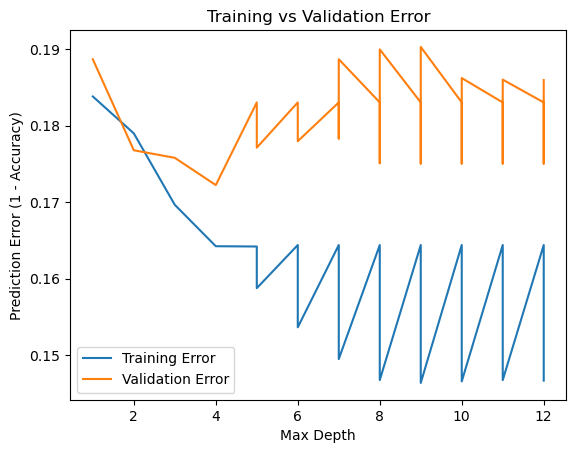

In [23]:
plt.plot(depths, train_error, label='Training Error')
plt.plot(depths, val_error, label='Validation Error')

plt.xlabel("Max Depth")
plt.ylabel("Prediction Error (1 - Accuracy)")
plt.title("Training vs Validation Error")
plt.legend()
plt.show()

In [24]:
prediction2 = mod.predict(train_input)

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(train_target, prediction2)

0.8342930456216915

In [26]:
mod.best_score_

0.8277771042954701

In [27]:
test_target_num = pd.Series(test_target).map({'No': 0, 'Yes': 1})
preds_num = pd.Series(prediction).map({'No': 0, 'Yes': 1})

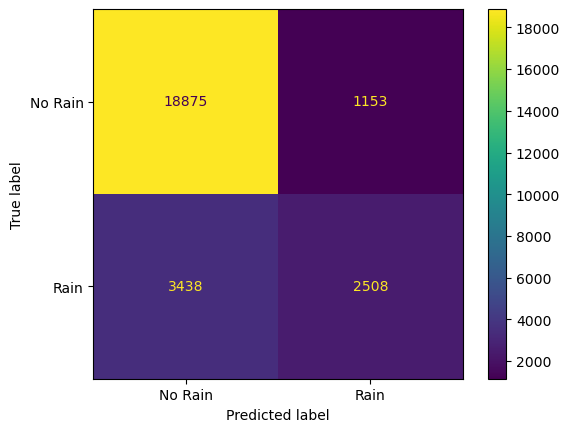

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    test_target_num,
    preds_num,
    display_labels=['No Rain', 'Rain']
)

plt.show()

In [29]:
from sklearn. tree import plot_tree, export_text

In [30]:
best_pipe = mod.best_estimator_

In [31]:
tree_model = best_pipe.named_steps['model']
feature_names = best_pipe.named_steps['prep'].get_feature_names_out()

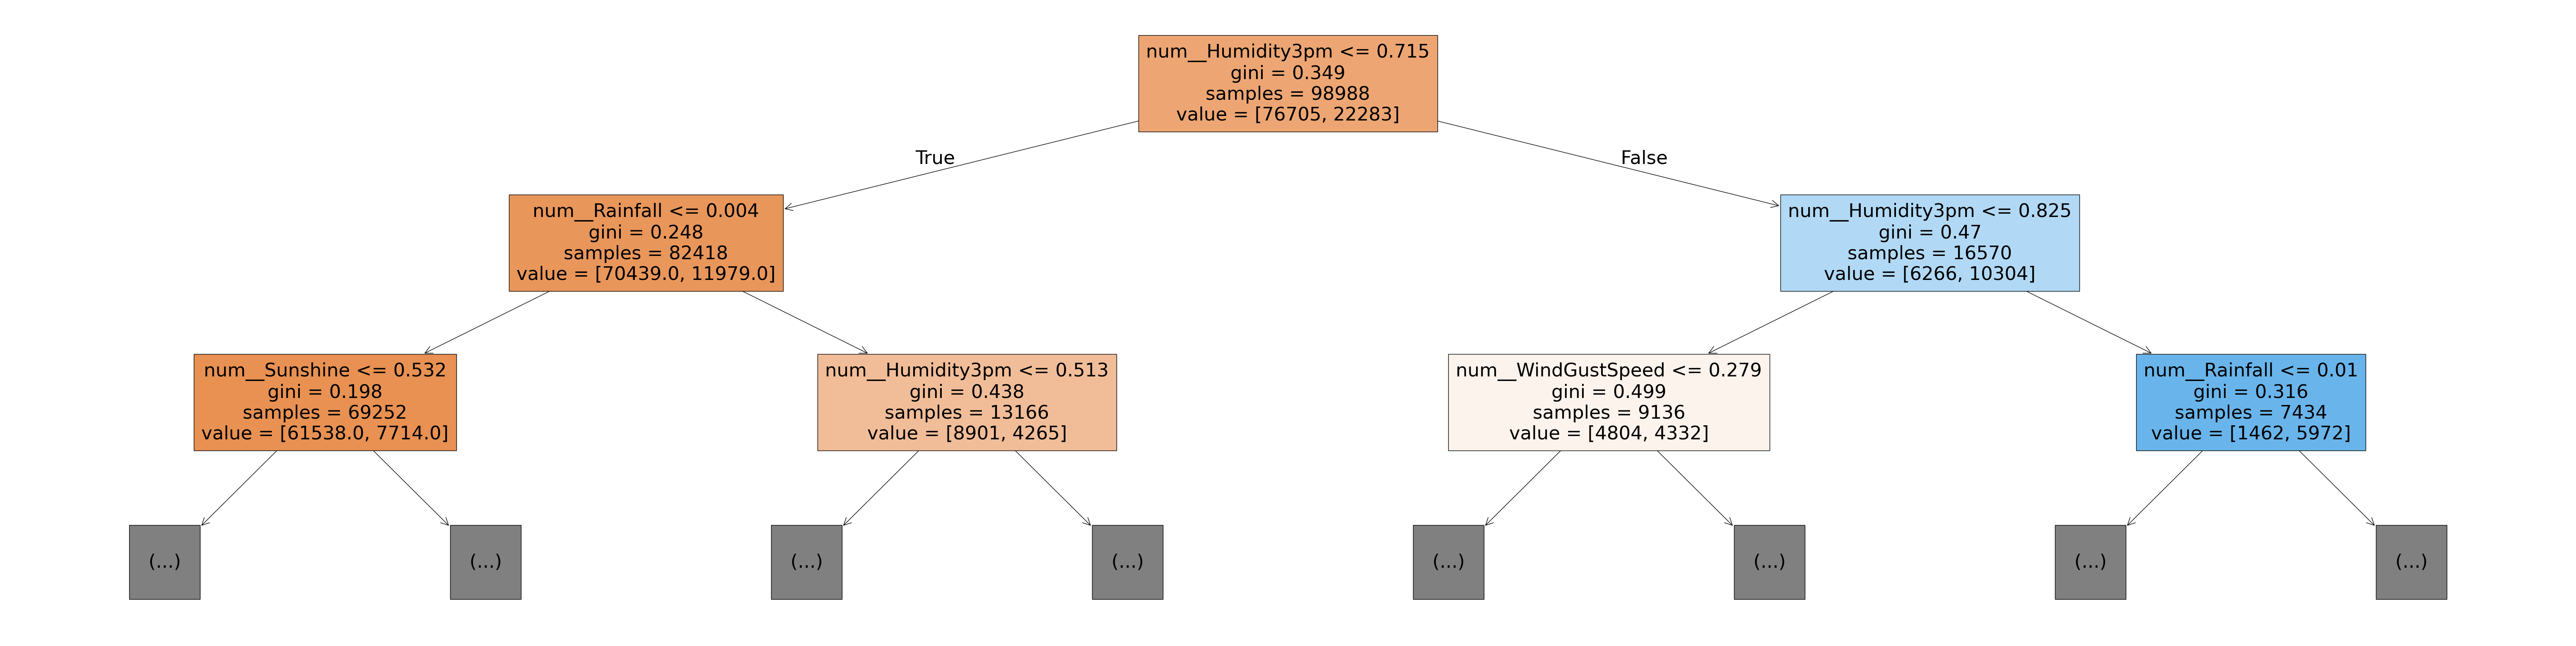

In [32]:
plt.figure(figsize=(80, 20))
plot_tree(
    tree_model,
    feature_names=feature_names,
    max_depth=2,
    filled=True
)
plt.show()

# **Low gini score good split, high gini score bad split**

In [34]:
tree_text = export_text(tree_model, max_depth=10, feature_names=feature_names)
print(tree_text)

|--- num__Humidity3pm <= 0.72
|   |--- num__Rainfall <= 0.00
|   |   |--- num__Sunshine <= 0.53
|   |   |   |--- num__Pressure3pm <= 0.57
|   |   |   |   |--- class: No
|   |   |   |--- num__Pressure3pm >  0.57
|   |   |   |   |--- class: No
|   |   |--- num__Sunshine >  0.53
|   |   |   |--- num__Humidity3pm <= 0.51
|   |   |   |   |--- class: No
|   |   |   |--- num__Humidity3pm >  0.51
|   |   |   |   |--- class: No
|   |--- num__Rainfall >  0.00
|   |   |--- num__Humidity3pm <= 0.51
|   |   |   |--- num__WindGustSpeed <= 0.32
|   |   |   |   |--- class: No
|   |   |   |--- num__WindGustSpeed >  0.32
|   |   |   |   |--- class: No
|   |   |--- num__Humidity3pm >  0.51
|   |   |   |--- num__WindGustSpeed <= 0.33
|   |   |   |   |--- class: No
|   |   |   |--- num__WindGustSpeed >  0.33
|   |   |   |   |--- class: Yes
|--- num__Humidity3pm >  0.72
|   |--- num__Humidity3pm <= 0.82
|   |   |--- num__WindGustSpeed <= 0.28
|   |   |   |--- num__Rainfall <= 0.00
|   |   |   |   |--- class

In [35]:
tree_model.get_n_leaves()      # number of leaf nodes

16

In [36]:
tree_model.get_depth()         # maximum depth

4

In [37]:
tree_model.n_features_in_     # number of input features

115

In [38]:
feature_df = pd.DataFrame({
    'feature': feature_names,
    'importance': tree_model.feature_importances_
})

In [39]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature     115 non-null    object 
 1   importance  115 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.9+ KB


In [40]:
feature_df

,feature,importance
0,num__MinTemp,0.000000
1,num__MaxTemp,0.000000
2,num__Rainfall,0.126895
3,num__Evaporation,0.000000
4,num__Sunshine,0.047521
...,...,...
110,cat__WindDir3pm_W,0.000000
111,cat__WindDir3pm_WNW,0.000000
112,cat__WindDir3pm_WSW,0.000000
113,cat__RainToday_No,0.000000


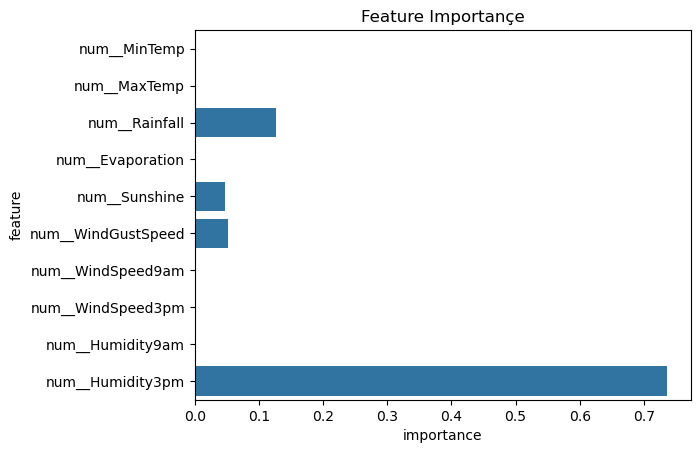

In [119]:
plt. title('Feature Importançe')
sns. barplot (data=feature_df.head(10), x='importance', y='feature');

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
pipe2 = Pipeline([
    ('prep', preprocess),
    ('model', RandomForestClassifier(n_jobs=-1, random_state=42))
])

In [97]:
mod1 = GridSearchCV(estimator = pipe2,
                  param_grid = {},
                  cv= 3,
                  scoring = 'accuracy',
                  return_train_score=True )

In [99]:
mod1.fit(train_input, train_target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer()),
                                                                                         ('scale',
                                                                                          MinMaxScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Rainfall',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',
                                                                          'Cloud9am',
                                                                          'Cloud3pm',
                                                                          'Temp9am',
                                                                          'Temp3pm']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainToday'])])),
                                       ('model',
                                        RandomForestClassifier(n_jobs=-1,
                                                               random_state=42))]),
             param_grid={}, return_train_score=True, scoring='accuracy')

In [109]:
mod1.best_score_

0.8269285165878694

In [121]:
best_pipeline = mod1.best_estimator_

In [123]:
tree_model1 = best_pipeline.named_steps['model']
feature_names1 = best_pipeline.named_steps['prep'].get_feature_names_out()

In [125]:
importance_df = pd.DataFrame({
    'feature': feature_names1,
    'importance': tree_model1.feature_importances_
})

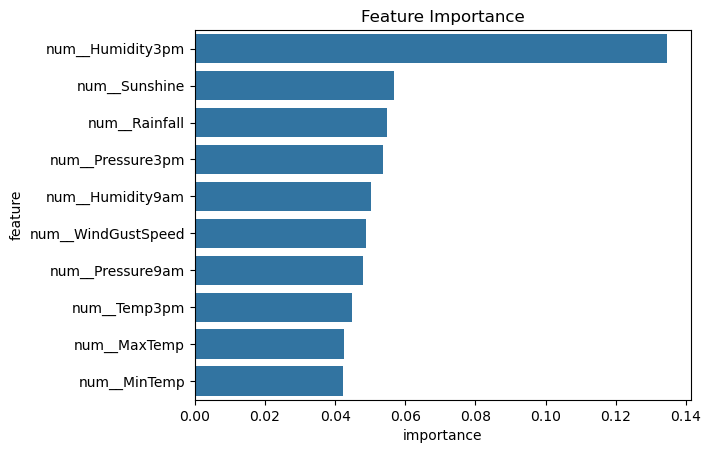

In [127]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.sort_values(by="importance", ascending=False).head(10), x='importance', y='feature');